### Phonon Unfolding and Projection (`puppy`)

1. example situation is a silver vacancy (*V*<sub>Ag</sub>) in AgI

In [38]:
import warnings 
import pprint
from puppy.unfolder import PhononUnfoldingandProjection as Puppy
import numpy as np 
warnings.simplefilter('ignore')


directories = {'defect_directory':'../example/agi/v_Ag/defect/',
               'host_directory':'../example/agi/v_Ag/host/'}


puppy = Puppy(defect_directory=directories['defect_directory'],
              host_directory=directories['host_directory'],
              line_density=200,
              nearest_neighbour_tolerance=4)
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(puppy.get_neighbour_sites()) # shows what you are interested in around the defect

puppy.get_host_phonons(eigenvectors=True)
puppy.get_defect_phonons()

puppy.matrix = np.array([[3,0,0],[0,3,0],[0,0,2]]) # here the matrix wasn't identified correctly...so just set it manually
puppy.matrix

found v_Ag vacancy defect at site [0.444,0.556,0.501] in structure (index = 31)
{'Ag': [], 'I': [66, 38, 39, 42]}


array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 2]])

In [39]:
puppy.unfold()
puppy.eigenvectors_to_eigendisplacements()

generating_eigendisplacements...: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]


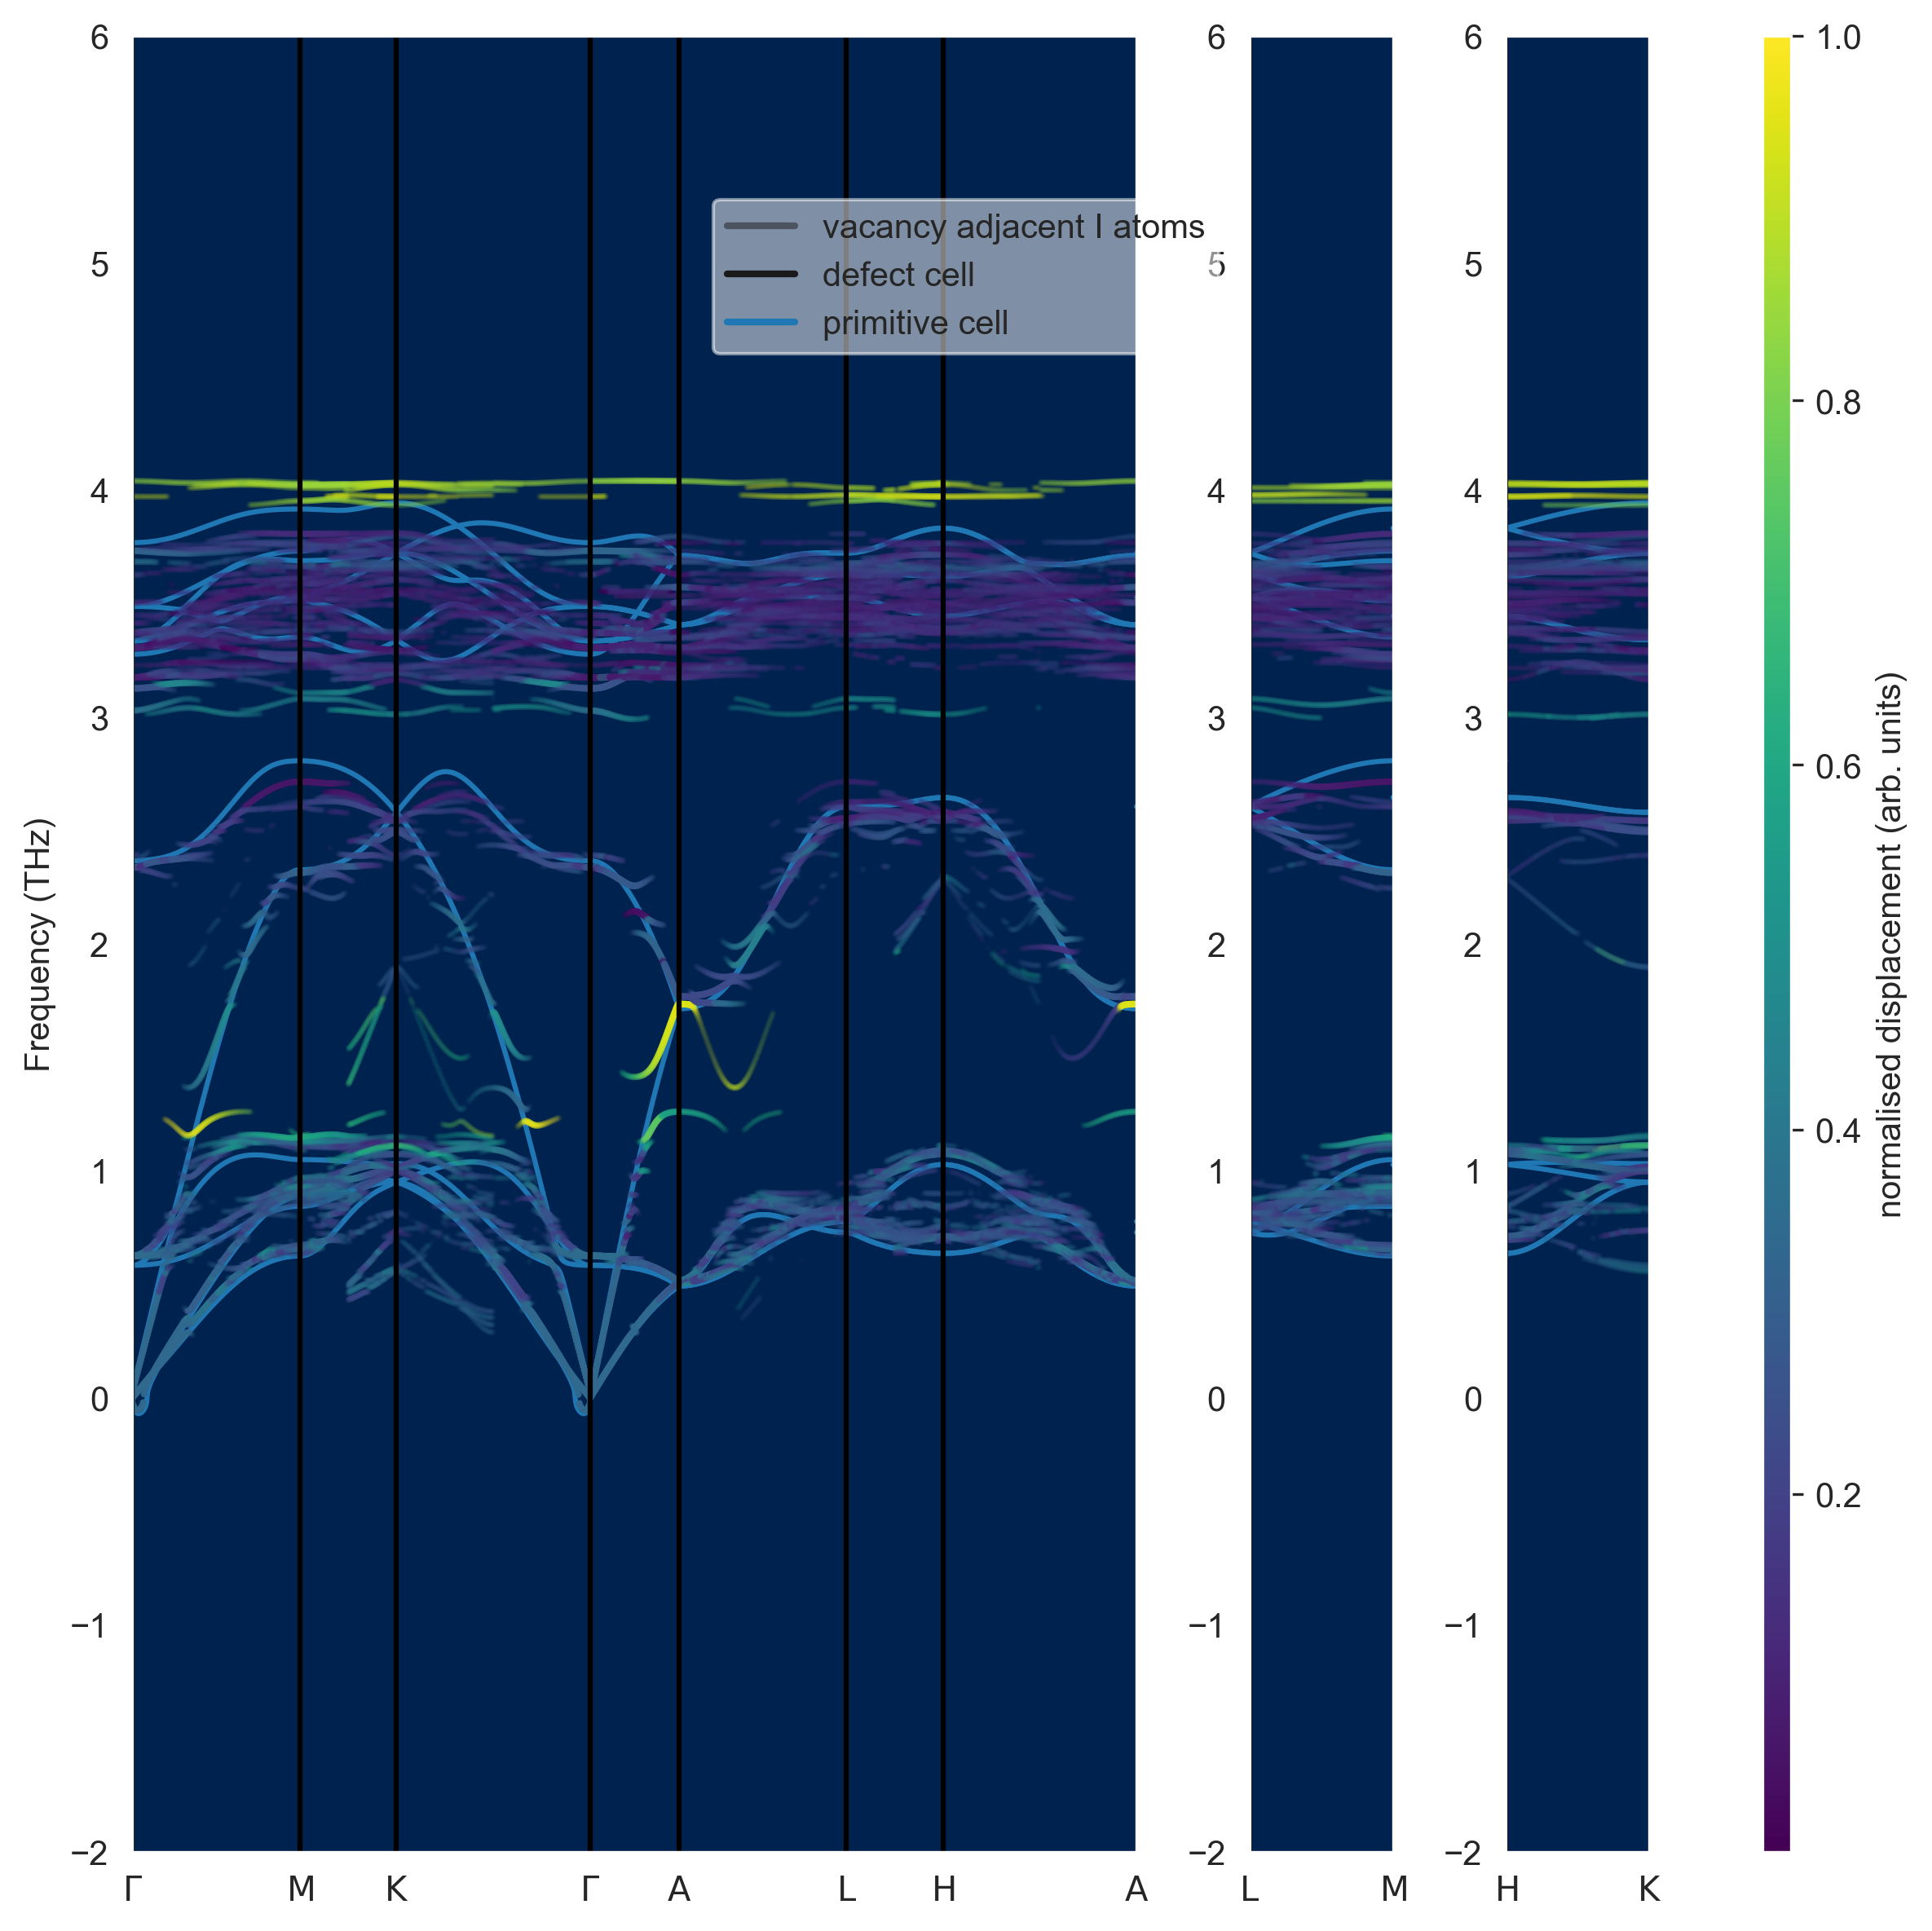

In [51]:
import matplotlib as mpl 
cmap = 'cividis'
mpl.rcParams['pdf.fonttype'] = 42
comap = mpl.colormaps.get_cmap(cmap)
mpl.rcParams["axes.facecolor"] = comap.colors[0]

plot_kws={'s':1,'rasterized':True,'edgecolor':None,'linewidths':None}

legend_kws={'facecolor':'white',
                        'framealpha':0.5,
                        'edgecolor':'white',
                        'bbox_to_anchor':[0.5,0.9],
                        'loc':'upper center'}

fig,axes = puppy.plot_unfold(
    with_prim=True,
    threshold=0.05,
    atom='I',
    plot_kws=plot_kws,
    legend_kws=legend_kws
)

In [52]:
fig.savefig('../unfolded.png')